In [ ]:
!pip install git+https://github.com/Ritvik19/pyradox.git

In [2]:
import keras
import numpy as np
from pyradox import modules

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
y_train = keras.utils.to_categorical(y_train, 10)

x_test = x_test.astype("float32") / 255
x_test = np.expand_dims(x_test, -1)
y_test = keras.utils.to_categorical(y_test, 10)

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
inputs = keras.Input(shape=(28, 28, 1))
x = modules.Convolution2D(padding='same', activation='relu', batch_normalization=True, dropout=0.2)(inputs)
x = keras.layers.GlobalAvgPool2D()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

model = keras.models.Model(inputs=inputs, outputs=outputs) 

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 778
Trainable params: 714
Non-trainable params: 64
____________________________________________________________

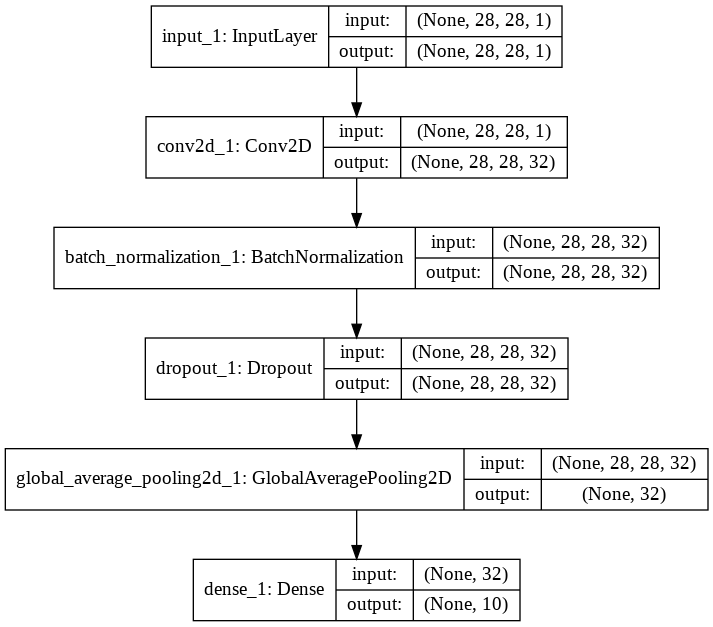

In [5]:
model.summary()
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 14s 239us/step - loss: 1.6764 - val_loss: 1.4315
